In [174]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
import os
# Define the directory path using double backslashes
directory_path = 'C:\\Users\Hp\\Downloads\\pg-bhat-dataset\\datasets\\train'
directory_path1 = 'C:\\Users\\Hp\\Downloads\\pg-bhat-dataset\\datasets\\test'
files = os.listdir(directory_path)
files2=os.listdir(directory_path1)
# Print the list of files
print(files)
print(files2)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [176]:
import os
import pandas as pd

# Define the directory path containing image files
directory_path ='C:\\Users\Hp\\Downloads\\pg-bhat-dataset\\datasets\\train'

# Get all the directories (classes) in the main directory
classes = os.listdir(directory_path)

# List to store image file paths and their corresponding class labels
image_data = []

# Iterate over each class directory
for class_name in classes:
    # Get the full path of the current class directory
    class_path = os.path.join(directory_path, class_name)
    
    # Get all the file names (image files) in the current class directory
    image_files = os.listdir(class_path)

    # Add image file paths and their corresponding class labels to the list
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        image_data.append((class_name, image_path))

# Build a DataFrame with image file paths and class labels
image_df = pd.DataFrame(data=image_data, columns=['class', 'image_path'])


In [177]:
df = image_df.loc[:,['class','image_path']]
df
df.to_csv('train.csv')
df.head()

,class,image_path
0,angry,C:\Users\Hp\Downloads\pg-bhat-dataset\datasets...
1,angry,C:\Users\Hp\Downloads\pg-bhat-dataset\datasets...
2,angry,C:\Users\Hp\Downloads\pg-bhat-dataset\datasets...
3,angry,C:\Users\Hp\Downloads\pg-bhat-dataset\datasets...
4,angry,C:\Users\Hp\Downloads\pg-bhat-dataset\datasets...


In [178]:
import os
import pandas as pd

# Define the directory path containing image files
directory_path = 'C:\\Users\\Hp\\Downloads\\pg-bhat-dataset\\datasets\\test'

# Get all the directories (classes) in the main directory
classes = os.listdir(directory_path)

# List to store image file paths and their corresponding class labels
image_data = []

# Iterate over each class directory
for class_name in classes:
    # Get the full path of the current class directory
    class_path = os.path.join(directory_path, class_name)
    
    # Get all the file names (image files) in the current class directory
    image_files = os.listdir(class_path)

    # Add image file paths and their corresponding class labels to the list
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        image_data.append((class_name, image_path))

# Build a DataFrame with image file paths and class labels
image_df = pd.DataFrame(data=image_data, columns=['class', 'image_path'])


In [179]:
df = image_df.loc[:,['class','image_path']]
df
df.to_csv('test.csv')
df.head()

,class,image_path
0,angry,C:\Users\Hp\Downloads\pg-bhat-dataset\datasets...
1,angry,C:\Users\Hp\Downloads\pg-bhat-dataset\datasets...
2,angry,C:\Users\Hp\Downloads\pg-bhat-dataset\datasets...
3,angry,C:\Users\Hp\Downloads\pg-bhat-dataset\datasets...
4,angry,C:\Users\Hp\Downloads\pg-bhat-dataset\datasets...


In [180]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split

In [181]:
# Load and preprocess data
def load_and_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((48, 48))  # Resize to (48, 48)
    image = image.convert("L")      # Convert to grayscale
    image = np.array(image) / 255.0 # Normalize pixel values
    return image

# Load data from CSV files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Load and preprocess images
train_images = np.array([load_and_preprocess_image(path) for path in train_df['image_path']])
test_images = np.array([load_and_preprocess_image(path) for path in test_df['image_path']])

# Extract labels
train_labels = train_df['class'].values
test_labels = test_df['class'].values

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Convert labels to categorical
train_labels_categorical = to_categorical(train_labels_encoded)
test_labels_categorical = to_categorical(test_labels_encoded)

# Split the data into training and testing sets
train_images, val_images, train_labels_categorical, val_labels_categorical = train_test_split(train_images, train_labels_categorical, test_size=0.2, random_state=42)


In [182]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')  # Adjust the number of units to match the number of classes
])

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)              │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,407 (1.21 MB)

 Trainable params: 318,407 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [183]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_categorical, epochs=15, batch_size=64, validation_data=(val_images, val_labels_categorical))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels_categorical)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 80ms/step - accuracy: 0.2745 - loss: 1.7857 - val_accuracy: 0.3903 - val_loss: 1.5622
Epoch 2/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.4163 - loss: 1.5123 - val_accuracy: 0.4545 - val_loss: 1.4237
Epoch 3/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 81ms/step - accuracy: 0.4854 - loss: 1.3527 - val_accuracy: 0.4847 - val_loss: 1.3406
Epoch 4/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 81ms/step - accuracy: 0.5280 - loss: 1.2456 - val_accuracy: 0.5073 - val_loss: 1.3197
Epoch 5/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.5702 - loss: 1.1538 - val_accuracy: 0.5261 - val_loss: 1.2701
Epoch 6/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 81ms/step - accuracy: 0.6054 - loss: 1.0551 - val_accuracy: 0.5336 - val_loss: 1.2529
Epoch 7/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 70s 194ms/step - accuracy: 0.6452 - loss: 0.9582 - val_accuracy: 0.5475 - val_loss: 1.2570
Epoch 8/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.6849 - loss: 0.8577 -

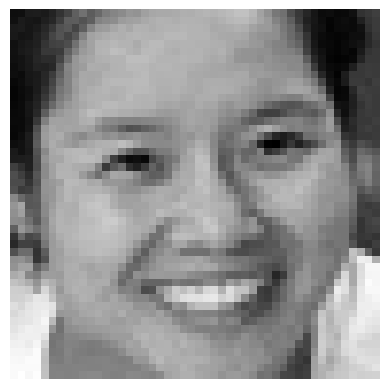

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted emotion: Happy


In [192]:
# Select a random index for prediction
num = randint(0, len(test_images) - 1)

# Plot the randomly selected test image
plt.imshow(test_images[num].reshape(48, 48), cmap='gray')
plt.axis('off')
plt.show()

# Get the predicted probabilities for each class for the randomly selected test image
predicted_probabilities = model.predict(test_images[num].reshape(1, 48, 48, 1))

# Find the index with the maximum probability
predicted_emotion_index = np.argmax(predicted_probabilities)

# Define a dictionary mapping indices to emotions
emotion_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Get the predicted emotion label
predicted_emotion = emotion_dict[predicted_emotion_index]

# Print the predicted emotion
print(f"Predicted emotion: {predicted_emotion}")